In [1]:
import os
import pandas as pd

# file_path = os.path.join('game', 'steam_game_descriptions_all.csv')
#
# if not os.path.exists(file_path):
#     print('File not found:', os.path.abspath(file_path))
# else:
#     print('File found:', os.path.abspath(file_path))
#     # Read the dataset
#     game_data = pd.read_csv(file_path)
#     print(game_data.head())

file_path1 = os.path.join('game', 'steam_game_descriptions_part_1.csv')
file_path2 = os.path.join('game', 'steam_game_descriptions_part_2.csv')

game_data = pd.DataFrame()

if os.path.exists(file_path1):
    print('File found:', os.path.abspath(file_path1))
    game_data_1 = pd.read_csv(file_path1)
    game_data = game_data_1
else:
    print('File not found:', os.path.abspath(file_path1))

if os.path.exists(file_path2):
    print('File found:', os.path.abspath(file_path2))
    game_data_2 = pd.read_csv(file_path2)
    game_data = pd.concat([game_data, game_data_2], ignore_index=True)
else:
    print('File not found:', os.path.abspath(file_path2))

if game_data.empty:
    print("Error: No game data loaded.")
else:
    print(game_data.head())

File found: D:\data-mining-hcmiu\game\steam_game_descriptions_part_1.csv
File found: D:\data-mining-hcmiu\game\steam_game_descriptions_part_2.csv
    app_id                 name                                         tags  \
0  1769390        Lack of Water                       Casual,Strategy,Puzzle   
1  1769470  Non-Euclidean Chess                  Early Access,Strategy,Chess   
2  1769510            FEWAR-DVD               Arcade,Action Roguelike,Action   
3  1769640          Wilderplace             Exploration,Minimalist,Isometric   
4  1769730           Connection  Horror,Survival Horror,Psychological Horror   

                                        popular_tags     all_reviews  \
0  Casual,Strategy,Puzzle,Cute,Comedy,Physics,Sin...  1 user reviews   
1  Early Access,Strategy,Chess,Battle Royale,Boar...  8 user reviews   
2  Arcade,Action Roguelike,Action,Procedural Gene...   Very Positive   
3  Exploration,Minimalist,Isometric,Turn-Based Ta...        Positive   
4  Horror,Sur

In [2]:
game_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50795 entries, 0 to 50794
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   app_id        50795 non-null  int64  
 1   name          50795 non-null  object 
 2   tags          50795 non-null  object 
 3   popular_tags  50795 non-null  object 
 4   all_reviews   46548 non-null  object 
 5   all_percent   50795 non-null  object 
 6   all_count     30779 non-null  float64
 7   release_date  50795 non-null  object 
 8   developer     50462 non-null  object 
 9   publisher     50195 non-null  object 
 10  price         50795 non-null  object 
 11  description   50795 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 4.7+ MB


In [3]:
#Check data price
game_data['price'].value_counts()

price
Free To Play              4768
Free                      3491
$4.99                     2798
15.000₫                   2623
$0.99                     1972
                          ... 
675.000₫                     1
666.000₫                     1
Four Realms Demo             1
Black Hole Hazard Demo       1
32.500₫                      1
Name: count, Length: 1345, dtype: int64

In [4]:
#Unique value of data price
price_unique=game_data['price'].unique()
for i in price_unique:
    print(i)

$5.99 
$7.99 
Free To Play
$12.99 
$9.99 
$3.99 
$2.99 
$19.99 
$24.99 
$1.99 
$11.99 
Free
$6.99 
$4.99 
$14.99 
$39.99 
$29.99 
$0.99 
$59.99 
$64.99 
$13.99 
$9.98 
$17.99 
$89.99 
$8.99 
$2.09 
$79.99 
$10.99 
$69.99 
$11.15 
$18.99 
$10.21 
$2.00 
$1.00 
$199.99 
$1.77 
$44.99 
$4.50 
$16.49 
$0.69 
$49.99 
$182.90 
$15.99 
$22.48 
$2.49 
$5.49 
$4.20 
$9.90 
$16.99 
$4.24 
$12.49 
$14.95 
$4.48 
$13.58 
$10.47 
$6.49 
$2.36 
$2.30 
$34.99 
$54.99 
$5.00 
$8.00 
$1.59 
$20.00 
$22.99 
$34.83 
$47.91 
$4.19 
$2.98 
$3.00 
$11.98 
$4.78 
$9.00 
$99.99 
$2.39 
$6.39 
$7.19 
$4.33 
$32.85 
$0.49 
$12.73 
$3.19 
$14.85 
$18.62 
$24.97 
$7.49 
$1.39 
$1.49 
$4.49 
$3.50 
$5.50 
$3.86 
$5.84 
$28.99 
$25.00 
$6.80 
$11.11 
$4.18 
Free to Play
$2.29 
$2.50 
$15.74 
$10.00 
$4.98 
$4.95 
$19.00 
$1.92 
$7.78 
$7.18 
$19.90 
$5.98 
$27.99 
$6.90 
$2.59 
$0.54 
$13.77 
$7.00 
$7.95 
$0.98 
$9.58 
$21.99 
$3.59 
$9.48 
$0.59 
$3.48 
$3.98 
$25.99 
$15.96 
$6.98 
$2.79 
$12.17 
$21.00 
$3.49 


In [5]:
#Converting price to float
def converting_price(price):
    price=str(price).lower()

    if 'free' in price or 'demo' in price:
        return 0
    elif '$' in price:
        price=price.replace('$', '')
        return float(price[1:].replace(',', ''))
    elif '₫' in price:
        price=price.replace('₫', '')
        return float(price[1:].replace('.', '')) / 25000
    else:
        return price

game_data['price']=game_data['price'].apply(converting_price)

price_unique=game_data['price'].unique()

for i in price_unique:
    print(i)

0.99
0
2.99
9.99
4.99
1.99
3.99
0.98
7.99
0.09
1.15
8.99
0.21
99.99
0.77
0.5
6.49
0.69
82.9
5.99
2.48
0.49
0.2
0.9
6.99
0.24
2.49
4.95
0.48
3.58
0.47
0.36
0.3
0.59
4.83
7.91
0.19
1.98
0.78
0.39
0.33
2.85
2.73
4.85
8.62
4.97
0.86
0.84
5.0
0.8
1.11
0.18
0.29
5.74
0.95
9.0
0.92
9.9
0.54
3.77
0.58
5.96
0.79
2.17
1.0
0.75
2.22
0.44
4.8
5.58
0.6
3.8
6.96
2.9
0.38
7.5
0.74
2.0
0.97
4.37
5.93
1.19
2.96
0.89
4.5
4.98
29.99
7.76
0.93
6.97
0.66
91.64
0.63
0.94
0.03
1.2
2.45
0.25
0.26
1.97
4.89
0.71
0.23
19.98
9.23
0.42
0.11
2.97
4.86
2.88
2.75
0.87
2.77
3.01
0.68
0.56
0.64
0.65
3.32
0.4
0.32
4.2
0.53
4.9
5.38
99.98
9.33
5.98
2.34
900.0
0.1
5.97
0.31
0.02
0.7
6.98
0.62
3.37
0.17
0.34
3.35
7.94
3.0
1.43
0.88
0.28
39.99
49.99
0.73
4.33
69.99
0.14
1.68
1.4
1.5
2.18
0.12
3.4
2.6
3.12
3.52
2.68
1.32
third-party
2.84
1.28
2.4
1.84
1.94
2.04
3.2
2.2
3.56
2.8
2.66
1.08
1.16
3.6
1.44
2.36
1.96
0.08
3.82
2.64
1.38
3.04
3.92
0.76
1.6
0.04
2.08
1.8
3.5
1.64
2.32
0.06
2.38
2.72
0.22
2.56
1.04
3.64
3.96
0.16
27

In [6]:
#Remove data price as string
game_data = game_data[~game_data['price'].apply(lambda x: isinstance(x, str))]
game_data['price'] = pd.to_numeric(game_data['price'], errors='coerce').astype('float')
game_data = game_data.dropna(subset=['price'])
price_unique=game_data['price'].unique()
for i in price_unique:
    print(i)

0.99
0.0
2.99
9.99
4.99
1.99
3.99
0.98
7.99
0.09
1.15
8.99
0.21
99.99
0.77
0.5
6.49
0.69
82.9
5.99
2.48
0.49
0.2
0.9
6.99
0.24
2.49
4.95
0.48
3.58
0.47
0.36
0.3
0.59
4.83
7.91
0.19
1.98
0.78
0.39
0.33
2.85
2.73
4.85
8.62
4.97
0.86
0.84
5.0
0.8
1.11
0.18
0.29
5.74
0.95
9.0
0.92
9.9
0.54
3.77
0.58
5.96
0.79
2.17
1.0
0.75
2.22
0.44
4.8
5.58
0.6
3.8
6.96
2.9
0.38
7.5
0.74
2.0
0.97
4.37
5.93
1.19
2.96
0.89
4.5
4.98
29.99
7.76
0.93
6.97
0.66
91.64
0.63
0.94
0.03
1.2
2.45
0.25
0.26
1.97
4.89
0.71
0.23
19.98
9.23
0.42
0.11
2.97
4.86
2.88
2.75
0.87
2.77
3.01
0.68
0.56
0.64
0.65
3.32
0.4
0.32
4.2
0.53
4.9
5.38
99.98
9.33
5.98
2.34
900.0
0.1
5.97
0.31
0.02
0.7
6.98
0.62
3.37
0.17
0.34
3.35
7.94
3.0
1.43
0.88
0.28
39.99
49.99
0.73
4.33
69.99
0.14
1.68
1.4
1.5
2.18
0.12
3.4
2.6
3.12
3.52
2.68
1.32
2.84
1.28
2.4
1.84
1.94
2.04
3.2
2.2
3.56
2.8
2.66
1.08
1.16
3.6
1.44
2.36
1.96
0.08
3.82
2.64
1.38
3.04
3.92
0.76
1.6
0.04
2.08
1.8
3.5
1.64
2.32
0.06
2.38
2.72
0.22
2.56
1.04
3.64
3.96
0.16
27.4
3.98
1.

In [7]:
#Price after converting
game_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50732 entries, 0 to 50794
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   app_id        50732 non-null  int64  
 1   name          50732 non-null  object 
 2   tags          50732 non-null  object 
 3   popular_tags  50732 non-null  object 
 4   all_reviews   46496 non-null  object 
 5   all_percent   50732 non-null  object 
 6   all_count     30740 non-null  float64
 7   release_date  50732 non-null  object 
 8   developer     50399 non-null  object 
 9   publisher     50132 non-null  object 
 10  price         50732 non-null  float64
 11  description   50732 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 5.0+ MB


In [8]:
game_data['price'].value_counts()

price
0.00     14624
0.99     14223
0.20      4150
0.80      2158
0.14      1143
         ...  
4.89         1
0.71         1
5.58         1
4.83         1
10.06        1
Name: count, Length: 314, dtype: int64

In [9]:
#Game prices except 0
data_price_to_plot=game_data[game_data['price']!=0]
data_price_to_plot.sort_values(by=['price'], ascending=False)

,app_id,name,tags,popular_tags,all_reviews,all_percent,all_count,release_date,developer,publisher,price,description
14971,2691920,MolCollabo v2,"Science,VR,Education","Science,VR,Education,Multiplayer,Online Co-Op,...",NaN,No user reviews,NaN,2019-11-11,FiatLux Corporatoin,FiatLux Corporatoin,900.00,MolCollabo is software that enables the 3D dis...
11291,2347750,Hidden Harbor 3 Top-Down 3D,"Casual,Action,Adventure","Casual,Action,Adventure,Racing,RPG,Simulation,...",Positive,81%,16.0,2018-09-28,Aztech,Azerbaijan Technology,99.99,Find the objects that are hidden on the map.
21440,3382830,Zombie Escape,"Action,Casual,Adventure","Action,Casual,Adventure,Simulation,Strategy,Ac...",NaN,No user reviews,NaN,2021-01-29,Rawi Studio,Rawi Studio,99.99,"After a zombie apocalypse, you gather food and..."
14984,2692760,ReHarmony,"Runner,Casual,Puzzle","Runner,Casual,Puzzle,Parkour,Adventure,3D,Cute...",NaN,No user reviews,NaN,2019-11-12,ReHarmony Games,ReHarmony Games,99.99,The main character finds themselves ensnared w...
9348,2204970,Hidden Harbor 2 Top-Down 3D,"Action,Adventure,Casual","Action,Adventure,Casual,Simulation,RPG,Strateg...",Mostly Positive,73%,15.0,2017-11-10,Aztech,Azerbaijan Technology,99.99,Find the objects that are hidden on the map.
...,...,...,...,...,...,...,...,...,...,...,...,...
40977,1233590,Warhammer Age of Sigmar: Storm Ground,"Strategy,Turn-Based Strategy,Fantasy","Strategy,Turn-Based Strategy,Fantasy,Turn-Base...",Mixed,60%,866.0,2024-02-16,Gasket Games,Focus Entertainment,0.02,Conquer the Mortal Realms! The first strategy ...
49977,1727440,Dyflexion,"Bullet Hell,Shoot 'Em Up,Old School","Bullet Hell,Shoot 'Em Up,Old School,Arcade,Sho...",1 user reviews,Need more user reviews to generate a score,NaN,2025-02-06,Pisces Studios,Pisces Studios,0.02,A vertical scroll shooter where deflecting ene...
38068,1120240,Ded Inside,"Casual,Indie,Action","Casual,Indie,Action,Adventure,Top-Down Shooter...",Positive,92%,39.0,2023-08-24,Oblom studio,BekkerDev Studio,0.02,Ded Inside is a topdown shooter in a large ope...
49553,1582950,Cinemoji,"Trivia,Word Game,Text-Based","Trivia,Word Game,Text-Based,Movie,Puzzle,Casua...",Positive,100%,22.0,2025-01-25,Gray Boss,Gray Boss,0.02,Do you watch many movies? Test your deduction ...


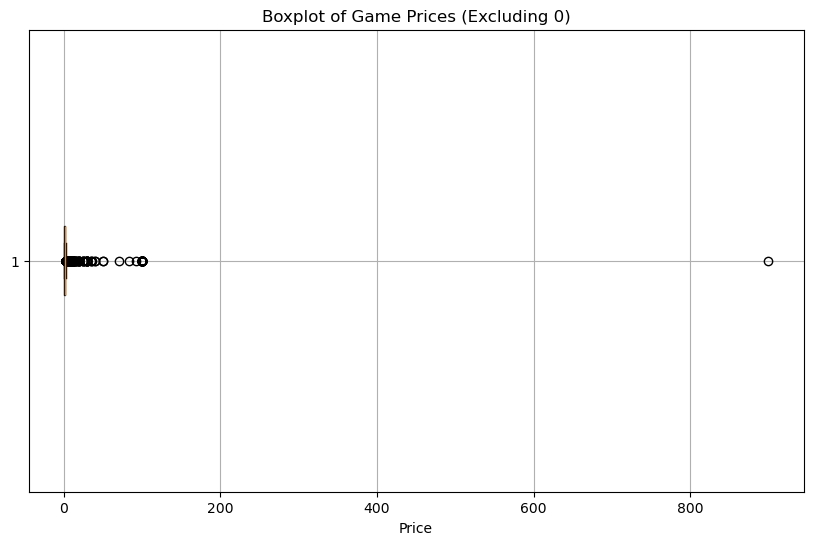

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.boxplot(data_price_to_plot['price'], vert=False, patch_artist=True)
plt.xlabel('Price')
plt.title('Boxplot of Game Prices (Excluding 0)')
plt.grid(True)
plt.show()

In [11]:
#Remove data > 100
game_data = game_data[game_data['price'] <= 100]

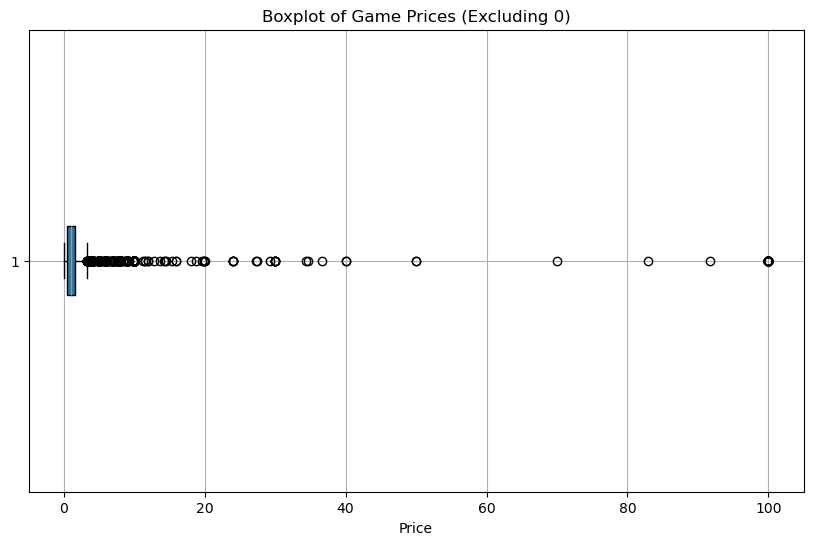

In [12]:
data_price=game_data[game_data['price'] >0]
plt.figure(figsize=(10, 6))
plt.boxplot(data_price['price'], vert=False, patch_artist=True)
plt.xlabel('Price')
plt.title('Boxplot of Game Prices (Excluding 0)')
plt.grid(True)
plt.show()

In [13]:
game_data['price'].isnull().sum()

0

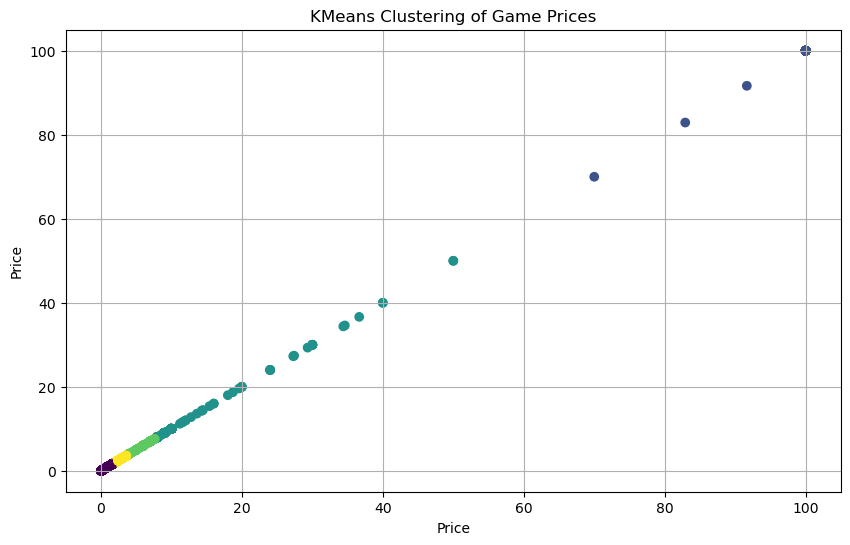

In [14]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0)
# Fit the data
filtered_data = game_data[game_data['price'] > 0].copy()

price_cluster = kmeans.fit_predict(filtered_data[['price']])
price_cluster_df = pd.DataFrame({
    'price': filtered_data['price'],
    'price_cluster': price_cluster
})
# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['price'], filtered_data['price'], c=price_cluster, cmap='viridis')
plt.xlabel('Price')
plt.ylabel('Price')
plt.title('KMeans Clustering of Game Prices')
plt.grid(True)
plt.show()

In [15]:
cluster_stats = price_cluster_df.groupby('price_cluster')['price'].agg(['min', 'max', 'mean']).reset_index()

# Print the cluster statistics
print(cluster_stats)

   price_cluster    min    max       mean
0              0   0.02   1.74   0.748942
1              1  69.99  99.99  99.136769
2              2   7.76  49.99  10.198062
3              3   3.90   7.60   5.051750
4              4   1.76   3.88   2.742028


In [16]:
def price_labeling(price):
    if price == 0:
        return 'Free'
    elif 0 < price <= 1.74:
        return 'Low'
    elif 1.74 < price <= 3.38:
        return 'Affordable'
    elif 3.38 < price <= 7.6:
        return 'Medium'
    elif 7.6 < price <= 49.99:
        return 'High'
    else:
        return 'Premium'

def price_mapping(price):
    if price == 0:
        return 0
    elif 0 < price <= 1.74:
        return 1
    elif 1.74 < price <= 3.38:
        return 2
    elif 3.38 < price <= 7.6:
        return 3
    elif 7.6 < price <= 49.99:
        return 4
    else:
        return 5
game_data['price_label']=game_data['price'].apply(price_labeling)
game_data['price_encoded']=game_data['price'].apply(price_mapping)

In [17]:
game_data.head()

,app_id,name,tags,popular_tags,all_reviews,all_percent,all_count,release_date,developer,publisher,price,description,price_label,price_encoded
0,1769390,Lack of Water,"Casual,Strategy,Puzzle","Casual,Strategy,Puzzle,Cute,Comedy,Physics,Sin...",1 user reviews,Need more user reviews to generate a score,NaN,1905-07-17,QuickBobber,QuickBobber,0.99,Lack of water is a puzzle game. You need to di...,Low,1
1,1769470,Non-Euclidean Chess,"Early Access,Strategy,Chess","Early Access,Strategy,Chess,Battle Royale,Boar...",8 user reviews,Need more user reviews to generate a score,NaN,1905-07-17,Cole Ferguson,Manifold Interactive,0.99,Non-Euclidean Chess provides a chess engine wi...,Low,1
2,1769510,FEWAR-DVD,"Arcade,Action Roguelike,Action","Arcade,Action Roguelike,Action,Procedural Gene...",Very Positive,98%,64.0,1905-07-17,dev_dwarf,NaN,0.00,A rapid arcade game. Avoid the swords. Find th...,Free,0
3,1769640,Wilderplace,"Exploration,Minimalist,Isometric","Exploration,Minimalist,Isometric,Turn-Based Ta...",Positive,100%,24.0,1905-07-17,Saman Bemel-Benrud,Saman Bemel-Benrud,2.99,Wilderplace is a turn-based spatial puzzle gam...,Affordable,2
4,1769730,Connection,"Horror,Survival Horror,Psychological Horror","Horror,Survival Horror,Psychological Horror,Fi...",1 user reviews,Need more user reviews to generate a score,NaN,1984-06-01,FTH GAMES,FTH GAMES,0.99,Don't lose the signal to get out of here.,Low,1


In [18]:
game_data['release_date'] = pd.to_datetime(game_data['release_date'], errors='coerce')

game_data['release_time_era'] = game_data['release_date'].dt.year

print(game_data['release_time_era'].unique())

[1905 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996
 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023 2024
 2025]


In [19]:
game_data['release_time_era'].value_counts()

release_time_era
2024    8658
2022    7421
2023    6740
2020    5466
2021    4979
2017    3406
2019    3250
2018    2505
2016    2247
2025    1909
2015    1512
2014     681
2011     222
2004     199
2010     195
2012     194
2009     175
2008     128
2013     127
2007     110
2006      96
2005      65
2003      58
1998      40
2001      39
1996      36
1997      33
1999      33
1994      30
2002      29
1995      27
2000      25
1993      22
1990      18
1992      14
1989      11
1991       9
1988       8
1987       4
1905       4
1986       3
1984       2
1985       1
Name: count, dtype: int64

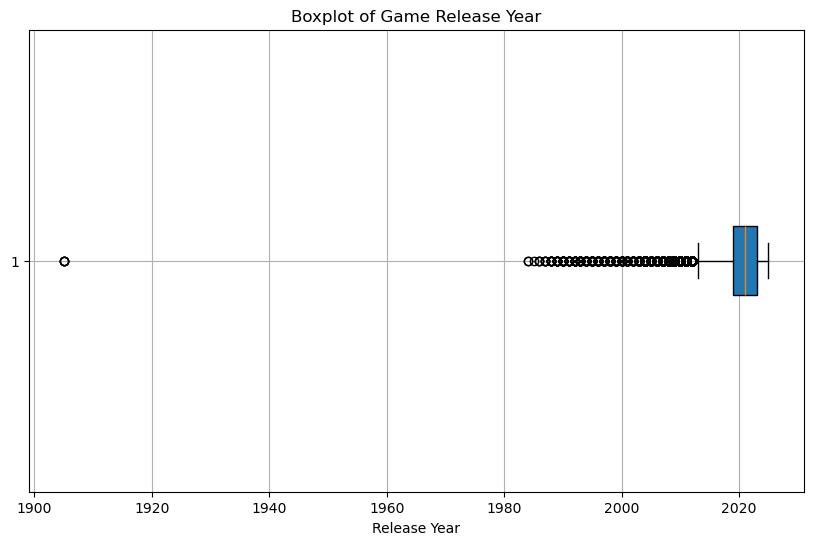

In [20]:
plt.figure(figsize=(10, 6))
plt.boxplot(game_data['release_time_era'], vert=False, patch_artist=True)
plt.xlabel('Release Year')
plt.title('Boxplot of Game Release Year')
plt.grid(True)
plt.show()

In [21]:
#Remove game year < 1980
game_data=game_data[game_data['release_time_era'] > 1980]

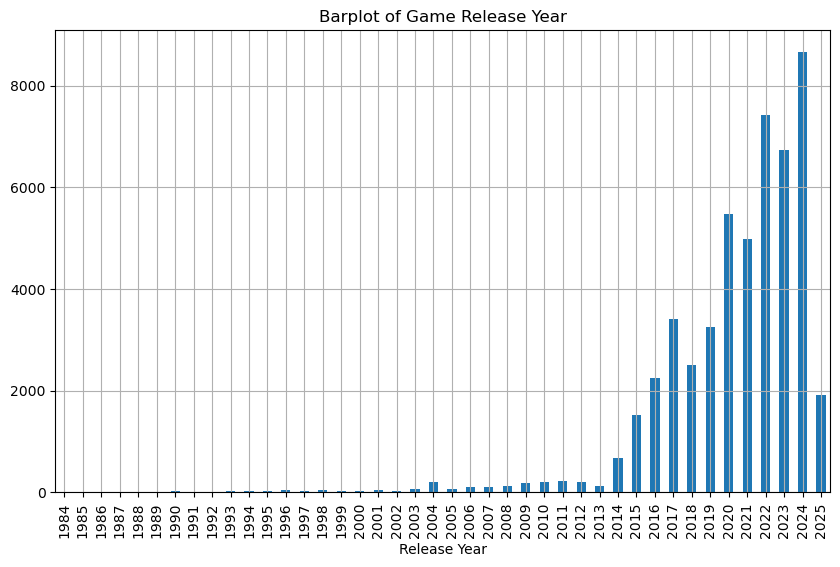

In [22]:
#Plot game year
plt.figure(figsize=(10, 6))
game_data['release_time_era'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Release Year')
plt.title('Barplot of Game Release Year')
plt.grid(True)
plt.show()

In [23]:
def release_year_labeling(release_year):
    if release_year <= 1990:
        return 'Dawn of Modern Gaming Era'
    elif 1991 <= release_year <= 1997:
        return 'Early Technology Era'
    elif 1998 <= release_year <= 2004:
        return 'CD-ROM Era'
    elif 2005 <= release_year <= 2011:
        return 'Online Multiplayer Era'
    elif 2012 <= release_year <= 2018:
        return 'Digital Distribution Era'
    else:
        return 'VR and Future Era'

def release_year_mapping(release_year):
    if release_year <= 1990:
        return 1
    elif 1991 <= release_year <= 1997:
        return 2
    elif 1998 <= release_year <= 2004:
        return 3
    elif 2005 <= release_year <= 2011:
        return 4
    elif 2012 <= release_year <= 2018:
        return 5
    else:
        return 6

game_data['release_year_encoded']=game_data['release_time_era'].apply(release_year_mapping)
game_data['release_time_era']=game_data['release_time_era'].apply(release_year_labeling)

In [24]:
game_data['release_time_era'].value_counts()

release_time_era
VR and Future Era            38423
Digital Distribution Era     10672
Online Multiplayer Era         991
CD-ROM Era                     423
Early Technology Era           171
Dawn of Modern Gaming Era       47
Name: count, dtype: int64

In [25]:
game_data['all_reviews'].value_counts()

all_reviews
Very Positive              8935
Positive                   7595
Mixed                      6916
Mostly Positive            5549
1 user reviews             3575
2 user reviews             2759
3 user reviews             2177
4 user reviews             1645
5 user reviews             1419
7 user reviews             1146
6 user reviews             1145
8 user reviews              985
9 user reviews              903
Mostly Negative             809
Overwhelmingly Positive     790
Negative                    128
Very Negative                11
Overwhelmingly Negative       5
Name: count, dtype: int64

In [26]:
game_data['all_reviews'].isnull().sum()

4235

In [27]:
game_data['all_reviews'].fillna('No reviews', inplace=True)

C:\Users\Khoi Dang\AppData\Local\Temp\ipykernel_20692\2864481998.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  game_data['all_reviews'].fillna('No reviews', inplace=True)


In [28]:
game_data['all_reviews'].value_counts()

all_reviews
Very Positive              8935
Positive                   7595
Mixed                      6916
Mostly Positive            5549
No reviews                 4235
1 user reviews             3575
2 user reviews             2759
3 user reviews             2177
4 user reviews             1645
5 user reviews             1419
7 user reviews             1146
6 user reviews             1145
8 user reviews              985
9 user reviews              903
Mostly Negative             809
Overwhelmingly Positive     790
Negative                    128
Very Negative                11
Overwhelmingly Negative       5
Name: count, dtype: int64

In [29]:
def review_labeling(review):
    if 'user reviews' in review:
        return 'Few user reviews'
    else:
        return review
game_data['all_reviews']=game_data['all_reviews'].apply(review_labeling)

In [30]:
game_data['all_reviews'].value_counts()

all_reviews
Few user reviews           15754
Very Positive               8935
Positive                    7595
Mixed                       6916
Mostly Positive             5549
No reviews                  4235
Mostly Negative              809
Overwhelmingly Positive      790
Negative                     128
Very Negative                 11
Overwhelmingly Negative        5
Name: count, dtype: int64

In [31]:
def review_encoding(review):
    if 'No reviews' in review:
        return 0
    elif 'Few user reviews' in review:
        return 1
    elif 'Very Negative' in review:
        return 2
    elif 'Mostly Negative' in review:
        return 3
    elif 'Negative' in review:
        return 4
    elif 'Mixed' in review:
        return 5
    elif 'Positive' in review:
        return 6
    elif 'Mostly Positive' in review:
        return 7
    elif 'Very Positive' in review:
        return 8
    elif 'Overwhelmingly Positive' in review:
        return 9

game_data['all_reviews_encoded']=game_data['all_reviews'].apply(review_encoding)

In [32]:
game_data['developer'].value_counts()

developer
Choice of Games             97
Laush Dmitriy Sergeevich    94
Creobit                     93
Boogygames Studios          92
Sokpop Collective           91
                            ..
Operation Breadcrumbs        1
CB Studio                    1
lidlocks                     1
OF                           1
1MB                          1
Name: count, Length: 35121, dtype: int64

In [33]:
game_data['developer'].isnull().sum()

333

In [34]:
game_data['developer'].fillna('Unknown', inplace=True)

C:\Users\Khoi Dang\AppData\Local\Temp\ipykernel_20692\3544048164.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  game_data['developer'].fillna('Unknown', inplace=True)


In [35]:
game_data['publisher'].value_counts()

publisher
8floor                 180
Strategy First         122
Conglomerate 5         111
Kagura Games           110
Laush Studio           102
                      ... 
ZeroGStudio              1
NitratEntertainment      1
Death Valley             1
Dots Factory Games       1
1MB                      1
Name: count, Length: 31325, dtype: int64

In [36]:
game_data['publisher'].isnull().sum()

599

In [37]:
game_data['publisher'].fillna('Unknown', inplace=True)

C:\Users\Khoi Dang\AppData\Local\Temp\ipykernel_20692\3870072623.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  game_data['publisher'].fillna('Unknown', inplace=True)


In [38]:
game_data['all_percent'].value_counts()

all_percent
Need more user reviews to generate a score    15754
No user reviews                                4235
100%                                           1816
90%                                            1270
93%                                            1125
                                              ...  
4%                                                2
12%                                               2
3%                                                1
2%                                                1
6%                                                1
Name: count, Length: 102, dtype: int64

In [39]:
game_data['all_percent'].isnull().sum()

0

In [40]:
game_data['all_percent'].unique()

array(['Need more user reviews to generate a score', 'No user reviews',
       '50%', '77%', '72%', '41%', '82%', '80%', '100%', '70%', '64%',
       '59%', '96%', '81%', '90%', '89%', '75%', '92%', '95%', '69%',
       '93%', '73%', '83%', '87%', '94%', '97%', '84%', '86%', '76%',
       '79%', '98%', '88%', '78%', '42%', '33%', '60%', '34%', '91%',
       '27%', '52%', '18%', '67%', '68%', '30%', '61%', '39%', '65%',
       '85%', '45%', '54%', '58%', '46%', '71%', '48%', '66%', '53%',
       '43%', '32%', '40%', '62%', '56%', '57%', '63%', '44%', '38%',
       '74%', '99%', '47%', '37%', '31%', '20%', '35%', '36%', '55%',
       '51%', '5%', '49%', '23%', '25%', '16%', '29%', '28%', '10%',
       '26%', '7%', '17%', '0%', '21%', '13%', '15%', '24%', '8%', '9%',
       '22%', '19%', '14%', '4%', '11%', '3%', '2%', '12%', '6%'],
      dtype=object)

In [41]:
def converting_percent(percent):
    percent = str(percent).lower()

    if 'user reviews' in percent:
        return 0
    elif '%' in percent:
        percent = percent.replace('%', '')
        return float(percent.replace(',', '')) if percent else 0
    else:
        return 0

game_data['all_percent'] = game_data['all_percent'].apply(converting_percent)

In [42]:
game_data['all_count'] = pd.to_numeric(game_data['all_count'], errors='coerce').astype('float')
game_data['all_count'].describe()
#75% of games have less than 265 reviews. which is a very low number.

count    3.073800e+04
mean     2.929736e+03
std      6.176386e+04
min      1.000000e+01
25%      2.100000e+01
50%      5.900000e+01
75%      2.647500e+02
max      8.610304e+06
Name: all_count, dtype: float64

In [43]:
game_data['all_count'].isnull().sum()

19989

In [44]:
game_data['all_count'].fillna(0, inplace=True)

C:\Users\Khoi Dang\AppData\Local\Temp\ipykernel_20692\932878116.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  game_data['all_count'].fillna(0, inplace=True)


In [45]:
game_data['all_count'].sort_values(ascending=False)

22271    8610304.0
29840    2510240.0
22270    2445361.0
25349    1163274.0
22273    1145400.0
           ...    
14005          0.0
35585          0.0
35584          0.0
35582          0.0
4              0.0
Name: all_count, Length: 50727, dtype: float64

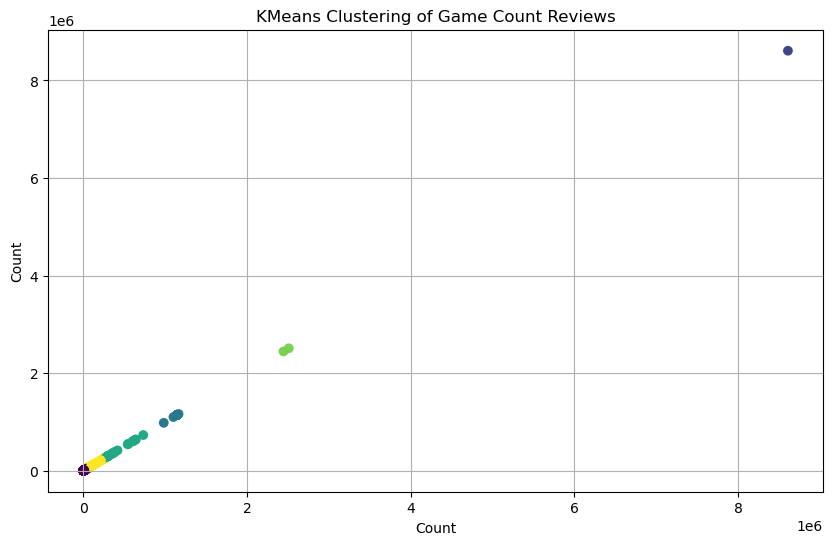

In [46]:
kmeans = KMeans(n_clusters=6, random_state=0)
# Fit the data
filtered_data = game_data[game_data['all_count'] > 0].copy()
filtered_data['count_cluster'] = kmeans.fit_predict(filtered_data[['all_count']])

count_cluster = kmeans.fit_predict(filtered_data[['all_count']])
count_cluster_df = pd.DataFrame({
    'count': filtered_data['all_count'],
    'count_cluster': count_cluster
})
# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['all_count'], filtered_data['all_count'], c=count_cluster, cmap='viridis')
plt.xlabel('Count')
plt.ylabel('Count')
plt.title('KMeans Clustering of Game Count Reviews')
plt.grid(True)
plt.show()

In [47]:
cluster_stats = count_cluster_df.groupby('count_cluster')['count'].agg(['min', 'max', 'mean']).reset_index()

# Print the cluster statistics
print(cluster_stats)

   count_cluster        min        max          mean
0              0       10.0    52427.0  8.837775e+02
1              1  8610304.0  8610304.0  8.610304e+06
2              2   982237.0  1163274.0  1.134836e+06
3              3   267232.0   731706.0  4.178968e+05
4              4  2445361.0  2510240.0  2.477800e+06
5              5    53712.0   261695.0  1.059532e+05


In [48]:
def count_labeling(count):
    if count==0:
        return 'No count'
    elif 10<= count <= 52427:
        return 'Low'
    elif 53712 <= count <= 261695:
        return 'Medium'
    elif 267232 <= count <= 731706:
        return 'High'
    elif 982237 <= count <= 1163274:
        return 'Very High'
    elif 2445361 <= count <= 2510240:
        return 'Extremely High'
    else:
        return 'GOAT'
def count_mapping(count):
    if count==0:
        return 0
    elif 10<= count <= 52427:
        return 1
    elif 53712 <= count <= 261695:
        return 2
    elif 267232 <= count <= 731706:
        return 3
    elif 982237 <= count <= 1163274:
        return 4
    elif 2445361 <= count <= 2510240:
        return 5
    else:
        return 6
game_data['all_count_encoded']=game_data['all_count'].apply(count_mapping)
game_data['all_count_label']=game_data['all_count'].apply(count_labeling)

In [49]:
game_data.head()

,app_id,name,tags,popular_tags,all_reviews,all_percent,all_count,release_date,developer,publisher,price,description,price_label,price_encoded,release_time_era,release_year_encoded,all_reviews_encoded,all_count_encoded,all_count_label
4,1769730,Connection,"Horror,Survival Horror,Psychological Horror","Horror,Survival Horror,Psychological Horror,Fi...",Few user reviews,0.0,0.0,1984-06-01,FTH GAMES,FTH GAMES,0.99,Don't lose the signal to get out of here.,Low,1,Dawn of Modern Gaming Era,1,1,0,No count
5,1769740,Cubes of Death,"Adventure,Singleplayer,PvE","Adventure,Singleplayer,PvE,Puzzle Platformer,3...",No reviews,0.0,0.0,1984-11-01,Madhatgames,Madhatgames,0.99,"Cubes of Death is a 3D-puzzle game, with both ...",Low,1,Dawn of Modern Gaming Era,1,0,0,No count
6,1769750,Jumpilla,"Casual,Platformer,Adventure","Casual,Platformer,Adventure,Runner,Side Scroll...",Few user reviews,0.0,0.0,1985-06-01,Cuneyt Aliustaoglu,Usta Games,0.99,An auto-runner controlled by a single mouse cl...,Low,1,Dawn of Modern Gaming Era,1,1,0,No count
7,1769760,Meet PIP,"Adventure,Casual,Point & Click","Adventure,Casual,Point & Click,Exploration,Puz...",Few user reviews,0.0,0.0,1986-01-01,PaperMill Games,PaperMill Games,0.99,"Walking through the forest, discover a bunker ...",Low,1,Dawn of Modern Gaming Era,1,1,0,No count
8,1769780,The Graffiti Creator,"Simulation,Design & Illustration,Character Cus...","Simulation,Design & Illustration,Character Cus...",Mixed,50.0,12.0,1986-07-01,Mike Wigen,Mike Wigen,0.99,Create Graffiti Art,Low,1,Dawn of Modern Gaming Era,1,5,1,Low


In [50]:
game_data['description'].head()

4            Don't lose the signal to get out of here.
5    Cubes of Death is a 3D-puzzle game, with both ...
6    An auto-runner controlled by a single mouse cl...
7    Walking through the forest, discover a bunker ...
8                                  Create Graffiti Art
Name: description, dtype: object

In [51]:
game_data['description'].isnull().sum()

0

In [52]:
import re
import emoji
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

def clean_text(text):
    if not isinstance(text, str):
        return ""
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove special characters, punctuation, and numbers
    text = re.sub(r'[^A-Za-z\s]', '', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    # Remove emojis (using regex instead of iteration)
    text = emoji.replace_emoji(text, replace='')  # Removes all emojis
    # Convert to lowercase
    text = text.lower()
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

game_data['description'] = game_data['description'].apply(clean_text)


[nltk_data] Downloading package stopwords to C:\Users\Khoi
[nltk_data]     Dang\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [53]:
game_data['description'].head()

4                                 dont lose signal get
5    cubes death dpuzzle game story mode single pla...
6    autorunner controlled single mouse click level...
7    walking forest discover bunker entrance andmee...
8                                  create graffiti art
Name: description, dtype: object

In [54]:
game_data['popular_tags'].value_counts()

popular_tags
Story Rich,Action,Cartoon,Family Friendly,Great Soundtrack,Parkour,Episodic,Choices Matter,Sci-fi,Massively Multiplayer,Adventure,Comedy,Cute,Roguelike,RPG,Indie,Simulation,Sandbox,Free to Play,Singleplayer       155
Action,Indie                                                                                                                                                                                                         127
Indie,Casual                                                                                                                                                                                                         118
Action,Indie,Casual                                                                                                                                                                                                   89
Indie                                                                                                                  

In [55]:
game_data['popular_tags'].isnull().sum()

0

In [56]:
game_data['tags'].head()

4          Horror,Survival Horror,Psychological Horror
5                           Adventure,Singleplayer,PvE
6                          Casual,Platformer,Adventure
7                       Adventure,Casual,Point & Click
8    Simulation,Design & Illustration,Character Cus...
Name: tags, dtype: object

In [57]:
game_data.head()

,app_id,name,tags,popular_tags,all_reviews,all_percent,all_count,release_date,developer,publisher,price,description,price_label,price_encoded,release_time_era,release_year_encoded,all_reviews_encoded,all_count_encoded,all_count_label
4,1769730,Connection,"Horror,Survival Horror,Psychological Horror","Horror,Survival Horror,Psychological Horror,Fi...",Few user reviews,0.0,0.0,1984-06-01,FTH GAMES,FTH GAMES,0.99,dont lose signal get,Low,1,Dawn of Modern Gaming Era,1,1,0,No count
5,1769740,Cubes of Death,"Adventure,Singleplayer,PvE","Adventure,Singleplayer,PvE,Puzzle Platformer,3...",No reviews,0.0,0.0,1984-11-01,Madhatgames,Madhatgames,0.99,cubes death dpuzzle game story mode single pla...,Low,1,Dawn of Modern Gaming Era,1,0,0,No count
6,1769750,Jumpilla,"Casual,Platformer,Adventure","Casual,Platformer,Adventure,Runner,Side Scroll...",Few user reviews,0.0,0.0,1985-06-01,Cuneyt Aliustaoglu,Usta Games,0.99,autorunner controlled single mouse click level...,Low,1,Dawn of Modern Gaming Era,1,1,0,No count
7,1769760,Meet PIP,"Adventure,Casual,Point & Click","Adventure,Casual,Point & Click,Exploration,Puz...",Few user reviews,0.0,0.0,1986-01-01,PaperMill Games,PaperMill Games,0.99,walking forest discover bunker entrance andmee...,Low,1,Dawn of Modern Gaming Era,1,1,0,No count
8,1769780,The Graffiti Creator,"Simulation,Design & Illustration,Character Cus...","Simulation,Design & Illustration,Character Cus...",Mixed,50.0,12.0,1986-07-01,Mike Wigen,Mike Wigen,0.99,create graffiti art,Low,1,Dawn of Modern Gaming Era,1,5,1,Low


In [58]:
game_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50727 entries, 4 to 50794
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   app_id                50727 non-null  int64         
 1   name                  50727 non-null  object        
 2   tags                  50727 non-null  object        
 3   popular_tags          50727 non-null  object        
 4   all_reviews           50727 non-null  object        
 5   all_percent           50727 non-null  float64       
 6   all_count             50727 non-null  float64       
 7   release_date          50727 non-null  datetime64[ns]
 8   developer             50727 non-null  object        
 9   publisher             50727 non-null  object        
 10  price                 50727 non-null  float64       
 11  description           50727 non-null  object        
 12  price_label           50727 non-null  object        
 13  price_encoded        

In [59]:
game_data.drop(columns=['all_reviews','all_count','release_date','price_label','release_time_era','all_count_label','price'], inplace=True)

In [60]:
game_data.head()

,app_id,name,tags,popular_tags,all_percent,developer,publisher,description,price_encoded,release_year_encoded,all_reviews_encoded,all_count_encoded
4,1769730,Connection,"Horror,Survival Horror,Psychological Horror","Horror,Survival Horror,Psychological Horror,Fi...",0.0,FTH GAMES,FTH GAMES,dont lose signal get,1,1,1,0
5,1769740,Cubes of Death,"Adventure,Singleplayer,PvE","Adventure,Singleplayer,PvE,Puzzle Platformer,3...",0.0,Madhatgames,Madhatgames,cubes death dpuzzle game story mode single pla...,1,1,0,0
6,1769750,Jumpilla,"Casual,Platformer,Adventure","Casual,Platformer,Adventure,Runner,Side Scroll...",0.0,Cuneyt Aliustaoglu,Usta Games,autorunner controlled single mouse click level...,1,1,1,0
7,1769760,Meet PIP,"Adventure,Casual,Point & Click","Adventure,Casual,Point & Click,Exploration,Puz...",0.0,PaperMill Games,PaperMill Games,walking forest discover bunker entrance andmee...,1,1,1,0
8,1769780,The Graffiti Creator,"Simulation,Design & Illustration,Character Cus...","Simulation,Design & Illustration,Character Cus...",50.0,Mike Wigen,Mike Wigen,create graffiti art,1,1,5,1


In [61]:
data_tags = game_data[['app_id', 'tags']]
data_tags.head()

,app_id,tags
4,1769730,"Horror,Survival Horror,Psychological Horror"
5,1769740,"Adventure,Singleplayer,PvE"
6,1769750,"Casual,Platformer,Adventure"
7,1769760,"Adventure,Casual,Point & Click"
8,1769780,"Simulation,Design & Illustration,Character Cus..."


In [62]:
data_tags['tags'] = data_tags['tags'].str.replace(',', ' ')
data_tags.head()

C:\Users\Khoi Dang\AppData\Local\Temp\ipykernel_20692\2880467509.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tags['tags'] = data_tags['tags'].str.replace(',', ' ')


,app_id,tags
4,1769730,Horror Survival Horror Psychological Horror
5,1769740,Adventure Singleplayer PvE
6,1769750,Casual Platformer Adventure
7,1769760,Adventure Casual Point & Click
8,1769780,Simulation Design & Illustration Character Cus...


In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
data_tags['tags_cleaned'] = data_tags['tags'].fillna('').str.lower().str.replace('[^a-zA-Z, ]', '', regex=True)
data_tags['tags_cleaned'] = data_tags['tags_cleaned'].str.split(',').apply(lambda x: ' '.join(tag.strip() for tag in x if tag.strip()))

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data_tags['tags_cleaned'])
# Check the shape of the TF-IDF matrix
print(f"TF-IDF matrix shape: {X.shape}")

C:\Users\Khoi Dang\AppData\Local\Temp\ipykernel_20692\1788142253.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tags['tags_cleaned'] = data_tags['tags'].fillna('').str.lower().str.replace('[^a-zA-Z, ]', '', regex=True)
C:\Users\Khoi Dang\AppData\Local\Temp\ipykernel_20692\1788142253.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tags['tags_cleaned'] = data_tags['tags_cleaned'].str.split(',').apply(lambda x: ' '.join(tag.strip() for tag in x if tag.strip()))


TF-IDF matrix shape: (50727, 469)


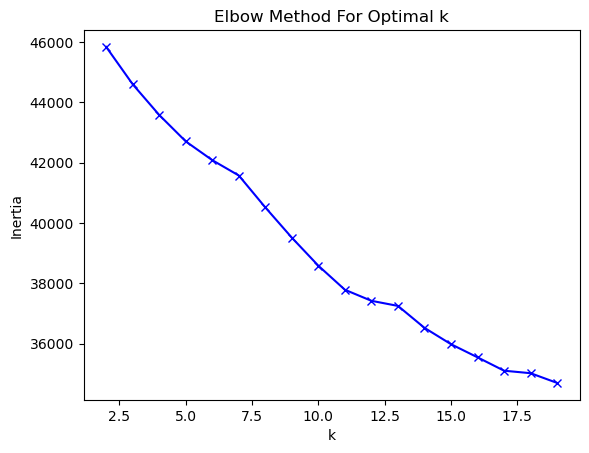

In [64]:
# Step 3: Determine Optimal k (Optional Elbow Method)
inertia = []
K = range(2, 20)
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    inertia.append(km.inertia_)

plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [65]:
# Step 4: Fit Final KMeans
k_final = 10  # Adjust based on elbow method
kmeans = KMeans(n_clusters=k_final, random_state=42)
data_tags['tag_cluster'] = kmeans.fit_predict(X)

# View sample
data_tags[['app_id', 'tags', 'tag_cluster']].head()

C:\Users\Khoi Dang\AppData\Local\Temp\ipykernel_20692\1092094725.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tags['tag_cluster'] = kmeans.fit_predict(X)


,app_id,tags,tag_cluster
4,1769730,Horror Survival Horror Psychological Horror,0
5,1769740,Adventure Singleplayer PvE,6
6,1769750,Casual Platformer Adventure,2
7,1769760,Adventure Casual Point & Click,6
8,1769780,Simulation Design & Illustration Character Cus...,6


In [66]:
# Group tags by tag_cluster
tags_in_clusters = data_tags.groupby('tag_cluster')['tags'].apply(list).reset_index()

# Display the result
print(tags_in_clusters)

   tag_cluster                                               tags
0            0  [Horror Survival Horror Psychological Horror, ...
1            1  [Turn-Based Strategy Hex Grid 4X, Strategy RTS...
2            2  [Casual Platformer Adventure, Side Scroller 2D...
3            3  [Simulation Realistic 3D, Simulation Automobil...
4            4  [Action Top-Down 2D, Arena Shooter FPS Third-P...
5            5  [Action Survival Horror VR, Action VR Horror, ...
6            6  [Adventure Singleplayer PvE, Adventure Casual ...
7            7  [Adventure Action Roguelike Action, Action Adv...
8            8  [Utilities Free to Play Minimalist, Free to Pl...
9            9  [Early Access Action RPG Hack and Slash, Early...


In [67]:
game_data=game_data.merge(data_tags[['app_id', 'tag_cluster']], on='app_id', how='left')

In [68]:
game_data.head()

,app_id,name,tags,popular_tags,all_percent,developer,publisher,description,price_encoded,release_year_encoded,all_reviews_encoded,all_count_encoded,tag_cluster
0,1769730,Connection,"Horror,Survival Horror,Psychological Horror","Horror,Survival Horror,Psychological Horror,Fi...",0.0,FTH GAMES,FTH GAMES,dont lose signal get,1,1,1,0,0
1,1769740,Cubes of Death,"Adventure,Singleplayer,PvE","Adventure,Singleplayer,PvE,Puzzle Platformer,3...",0.0,Madhatgames,Madhatgames,cubes death dpuzzle game story mode single pla...,1,1,0,0,6
2,1769750,Jumpilla,"Casual,Platformer,Adventure","Casual,Platformer,Adventure,Runner,Side Scroll...",0.0,Cuneyt Aliustaoglu,Usta Games,autorunner controlled single mouse click level...,1,1,1,0,2
3,1769760,Meet PIP,"Adventure,Casual,Point & Click","Adventure,Casual,Point & Click,Exploration,Puz...",0.0,PaperMill Games,PaperMill Games,walking forest discover bunker entrance andmee...,1,1,1,0,6
4,1769780,The Graffiti Creator,"Simulation,Design & Illustration,Character Cus...","Simulation,Design & Illustration,Character Cus...",50.0,Mike Wigen,Mike Wigen,create graffiti art,1,1,5,1,6


In [69]:
game_data.drop(columns=['tags','popular_tags'], inplace=True)
game_data.rename(columns={'tag_cluster':'tags_encoded'}, inplace=True)
game_data.head()

,app_id,name,all_percent,developer,publisher,description,price_encoded,release_year_encoded,all_reviews_encoded,all_count_encoded,tags_encoded
0,1769730,Connection,0.0,FTH GAMES,FTH GAMES,dont lose signal get,1,1,1,0,0
1,1769740,Cubes of Death,0.0,Madhatgames,Madhatgames,cubes death dpuzzle game story mode single pla...,1,1,0,0,6
2,1769750,Jumpilla,0.0,Cuneyt Aliustaoglu,Usta Games,autorunner controlled single mouse click level...,1,1,1,0,2
3,1769760,Meet PIP,0.0,PaperMill Games,PaperMill Games,walking forest discover bunker entrance andmee...,1,1,1,0,6
4,1769780,The Graffiti Creator,50.0,Mike Wigen,Mike Wigen,create graffiti art,1,1,5,1,6


In [70]:
game_data.to_csv('steam_game_data_encoded.csv', index=False)